<a href="https://colab.research.google.com/github/zakiyarofiq/Project_Akhir/blob/main/Augmentasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [ ]:
from google.colab import files
file = files.upload()

Saving p45.jpg to p45.jpg


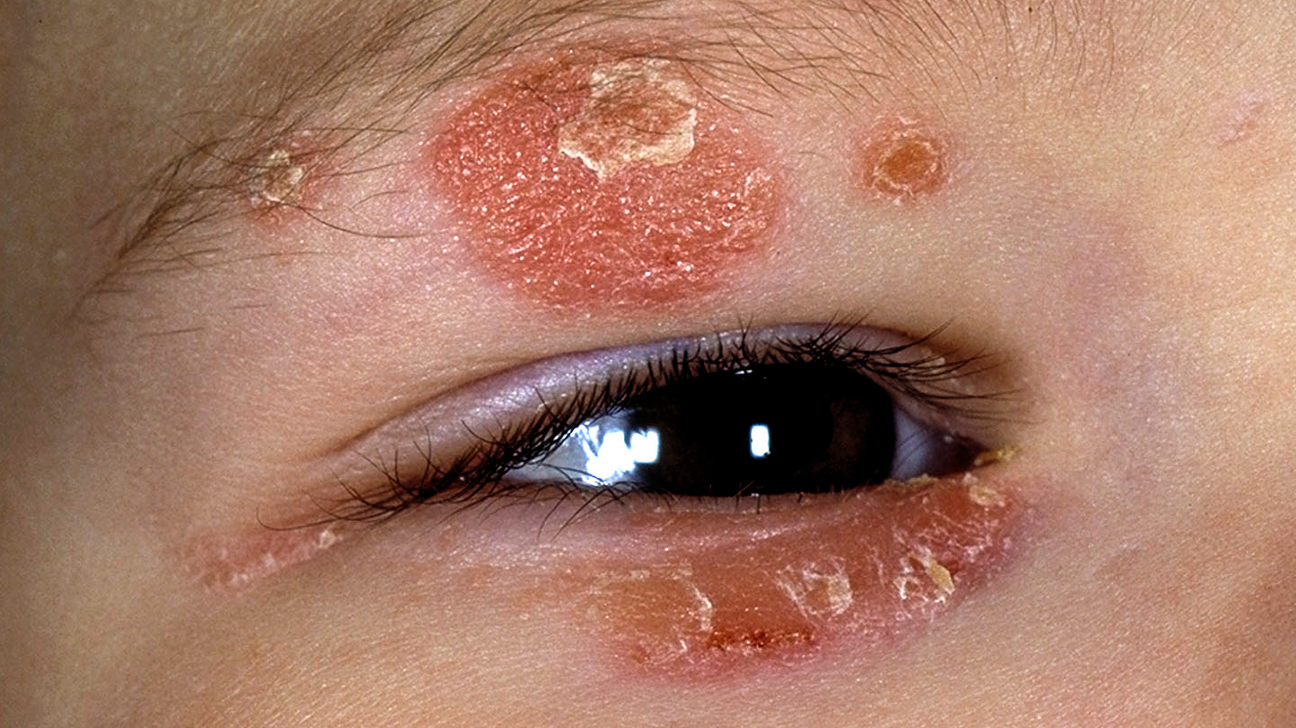

-1

In [ ]:
from google.colab.patches import cv2_imshow

# menyimpan gambar dengan fungsi imread dari OpenCV
img = "p45.jpg"
image = cv2.imread(img)  
# sesuaikan dengan nama file yang diunggah pada cell sebelumnya
cv2_imshow(image)
cv2.waitKey(0)

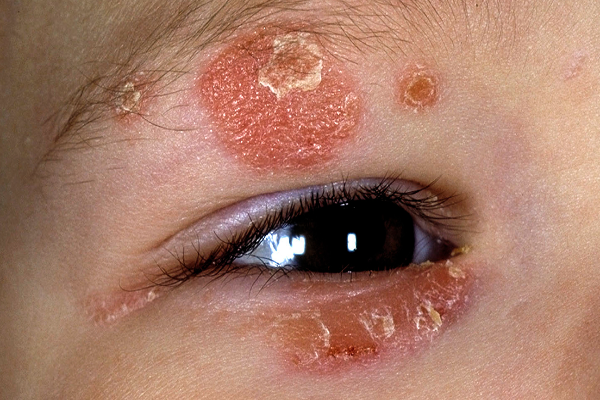

-1

In [ ]:
# dsize as pixel
dsize = (600, 400)

# resize image
resize = cv2.resize(image, dsize)

cv2_imshow(resize)
cv2.waitKey(0)

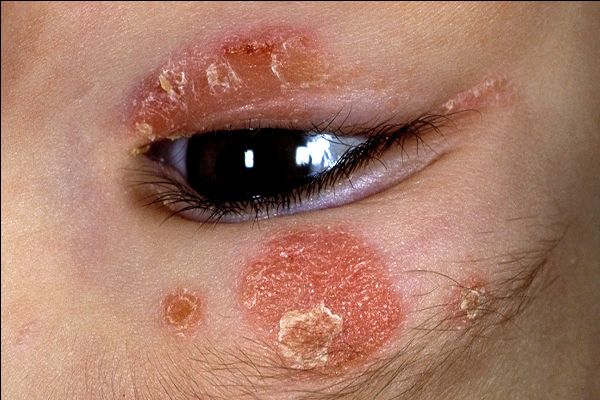

-1

In [ ]:
#rotasi gambar
height, width = resize.shape[:2]
#rumus rotasi
M = cv2.getRotationMatrix2D((width / 2,height / 2), 180, 1)
rotated = cv2.warpAffine(resize ,M ,(width ,height ))
#menampilkan rotasi
cv2_imshow(rotated)
cv2.waitKey(0)

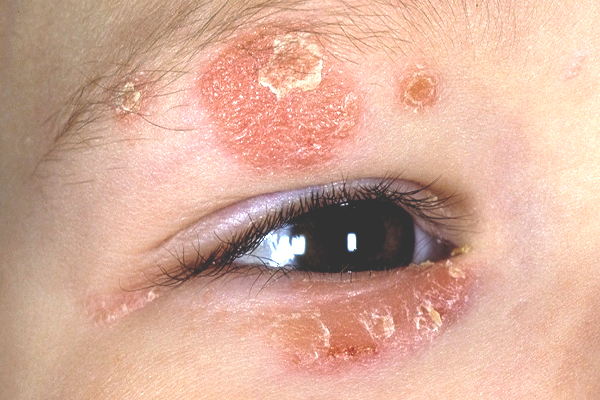

-1

In [ ]:
#brightness
M = np.ones(resize.shape, dtype='uint8') * 50
#menambahkan kecerahan
img_bright = cv2.add(resize, M)

cv2_imshow(img_bright)
cv2.waitKey(0)

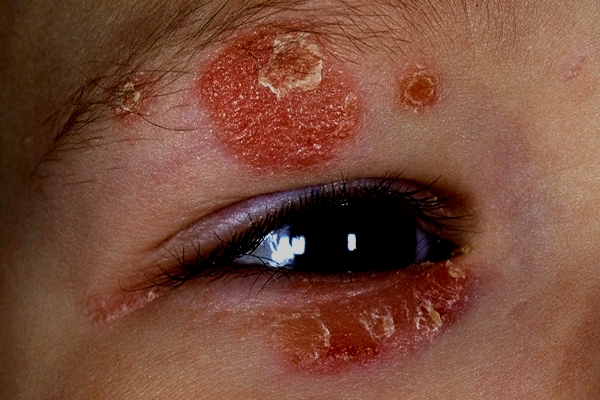

-1

In [ ]:
#mengurangi kecerahan
img_dark = cv2.subtract(resize, M)

cv2_imshow(img_dark)
cv2.waitKey(0)

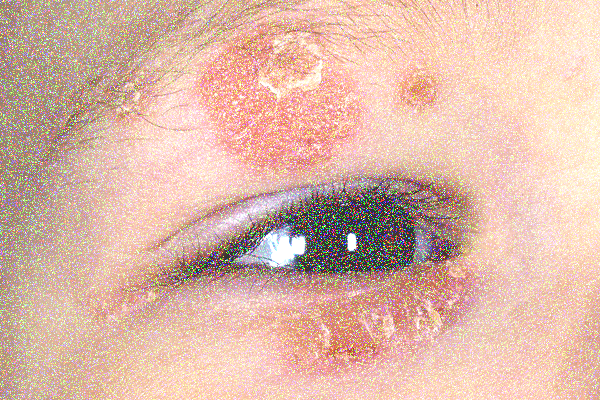

-1

In [ ]:
# Generate Gaussian noise
gauss = np.random.normal(0,1,img_bright.size)
gauss = gauss.reshape(img_bright.shape[0],img_bright.shape[1],img_bright.shape[2]).astype('uint8')
# Add the Gaussian noise to the image
img_gauss = cv2.add(img_bright,gauss)
# Display the image
cv2_imshow(img_gauss)
cv2.waitKey(0)

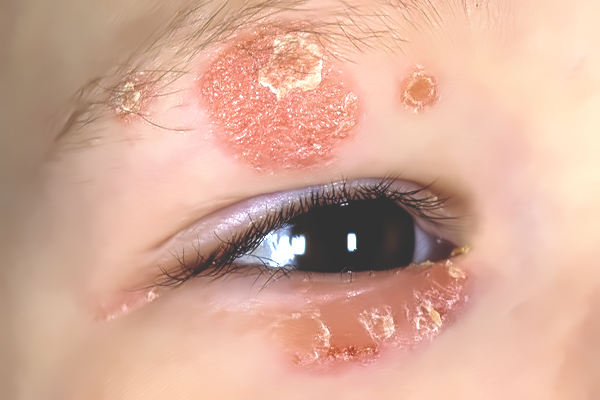

-1

In [ ]:
#menghapus noise gaussian
denoised_bright=cv2.fastNlMeansDenoising(img_bright, None, 8,8)

cv2_imshow(denoised_bright)
cv2.waitKey(0)

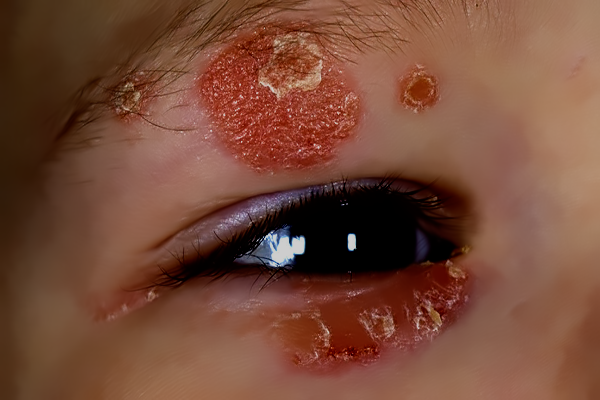

-1

In [ ]:
#menghapus noise gaussian
denoised_dark=cv2.fastNlMeansDenoising(img_dark, None, 8,8)

cv2_imshow(denoised_dark)
cv2.waitKey(0)

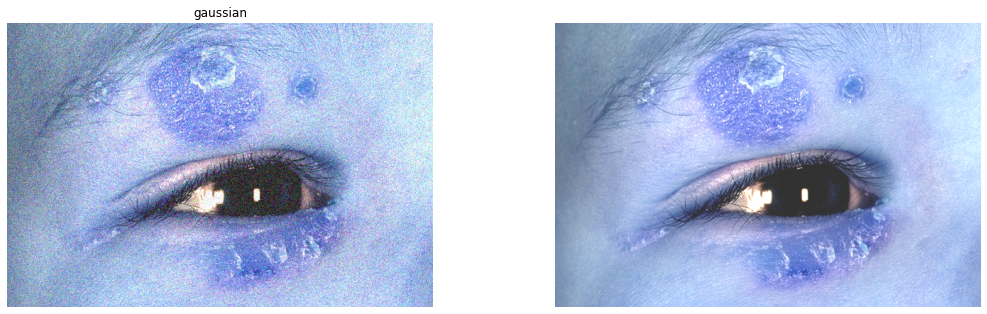

In [ ]:
import skimage
def plotnoise(img_bright, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img_bright, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img_bright)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img_bright, "gaussian", r,c,1)
plotnoise(img_bright, None, r,c,2)
plt.show()

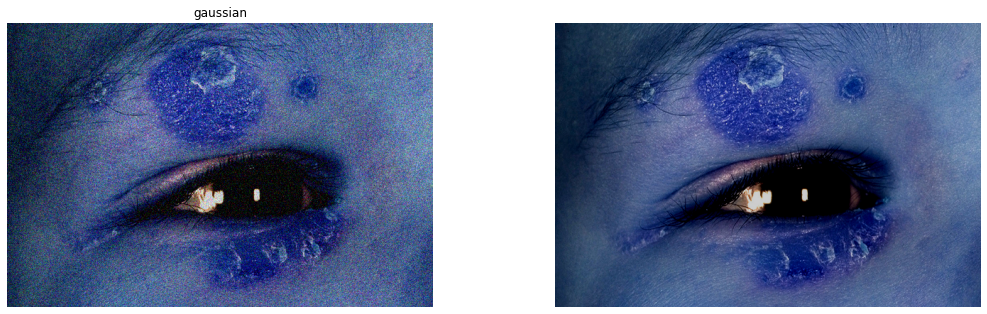

In [ ]:
def plotnoise(img_dark, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img_dark, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img_dark)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img_dark, "gaussian", r,c,1)
plotnoise(img_dark, None, r,c,2)
plt.show()

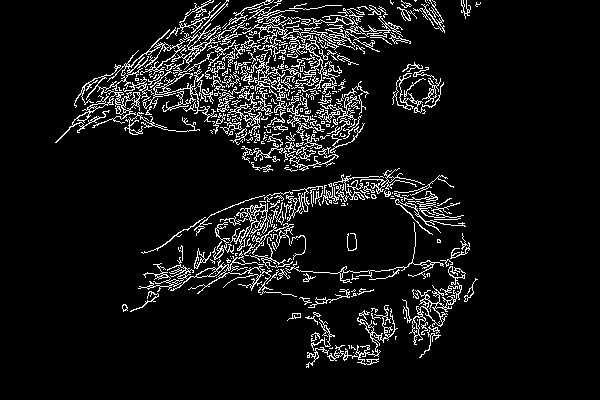

-1

In [ ]:
edges = cv2.Canny(denoised_bright,25,255,L2gradient=False)
cv2_imshow(edges)
cv2.waitKey(0)

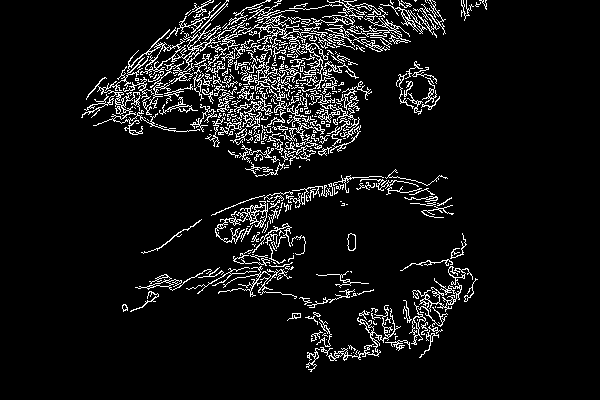

-1

In [ ]:
edges = cv2.Canny(denoised_dark,25,255,L2gradient=False)
cv2_imshow(edges)
cv2.waitKey(0)